# Change runtime type to R

Remember, the first step when opening a Google Colab notebook is to change the runtime type to R from Python. Our code will not work otherwise!

# Load the packages and data into R

At the beginning of any R project and before anything can really begin, we have two steps:

1) Load the packages that we will use.

2) Load the data in R (if it isn't already loaded into the system).

It helps keep the "work space" clean to load all the packages up front so that you know where they are loaded and can easily see which packages are required.

For now, the data we will use is located in R or in some packages. We will learn how to load external data into R at a later date.

In [1]:
## Load the ggplot2 package for visualizing data
library(ggplot2)

## The data are already loaded into R
## We can see a "snapshot" of the data using the head() function
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


## Explaining the table

The head() function shows the first six rows of the data by default. The 6 x 11 "tibble" is a 6 row by 11 column table. The column names (e.g., manufacturer, model, displ, year) have a subheading to show the type of data (i.e., <chr> means character, <int> and <dbl> both mean numeric values). For instance, the manufacturer column has character value entries (i.e., "audi").

A "tibble" is a collection of vectors. Consider each column as a vector.

# ggplot2, the Grammar of Graphics

In ggplot2, there are three components we must always consider but these components are *always* consistent across different types of graphs. These components are as follows:

1) The data and how it is structured/cleaned.

2) The mapping of aesthetics (e.g., which variable goes on which axis, what are the axis labels).

3) The geometric object, which is the type of graph to create and its specific features (e.g., number of bins in a histogram).

# Data in R

Because certain types of graphs require certain types of data, it is helpful to see what our data are actually like. We can view some characteristics of our data using two simple functions:

- head(DataObject): The head() function, applied to a data object (here, 'DataObject' is a placeholder) shows the first several rows of a data object to see what the columns are and some of the values in a column.

- str(DataObject): The str() function, also applied to a data object, will give you a high-level overview of the _str_ucture of your data object. For instance, it shows the variable/column names, the types of data (e.g., numeric, character, logical), how many rows/columns there are, etc.

Notice that data are in "long" format. This means that each *row* is an observation (like a person, or a car) and each *column* is a separate variable (such as the miles per gallon, horsepower, weight, etc.).

In [ ]:
## View the first few rows of the mtcars dataset
head(mtcars)

## View the structure of the mtcars dataset
str(mtcars)

# Aesthetics in ggplot

The aesthetics of a graph include some required elements and some additional/optional elements. Generally, mapping variables to the axis/axes is the required part and optional elements include colors, shapes, sizes, etc. for added flavoring. Let's see an example using a boxplot.

## A basic, simple boxplot

Ignore the x-axis labels here, the main feature we are looking at is the y-axis for the distribution of gas mileage in cars.


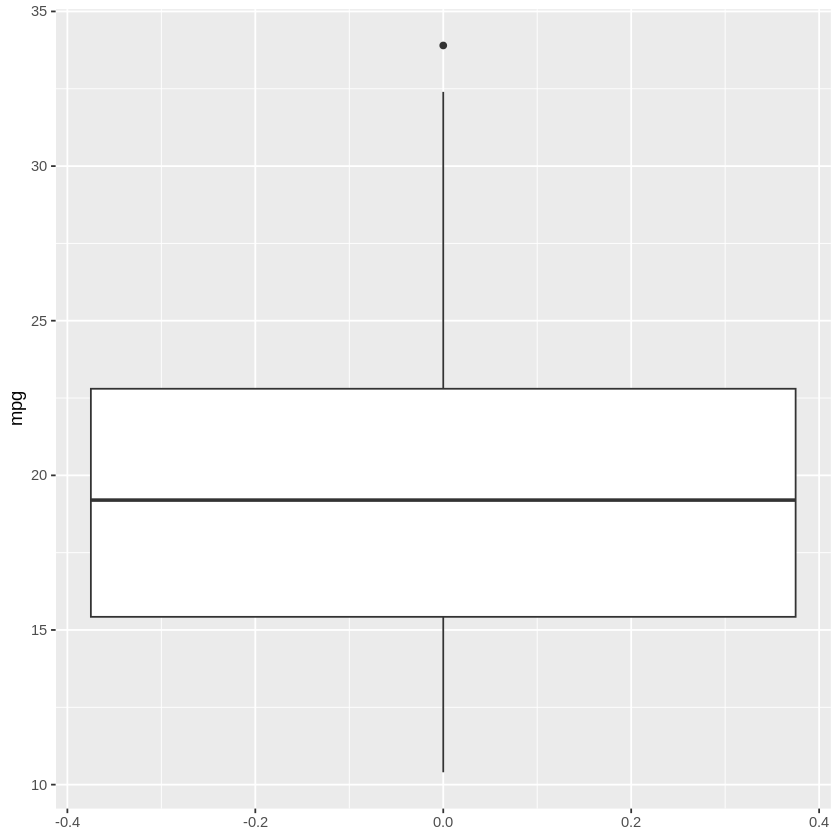

In [2]:
## A boxplot showing the distribution of miles per gallon of the cars
ggplot(data = mtcars, mapping = aes(y = mpg)) + geom_boxplot()

## Multiple boxplots, simple

Say we have 2 variables to visualize: miles per gallon (mpg) is continuous and the number of cylinders in the car (cyl) is categorical (i.e., either 4, 6, or 8 cylinders). We can map these variables using the aesthetics.

Note: Ignore the function factor() for now, that just tells R to force the variable cyl to be categorical.

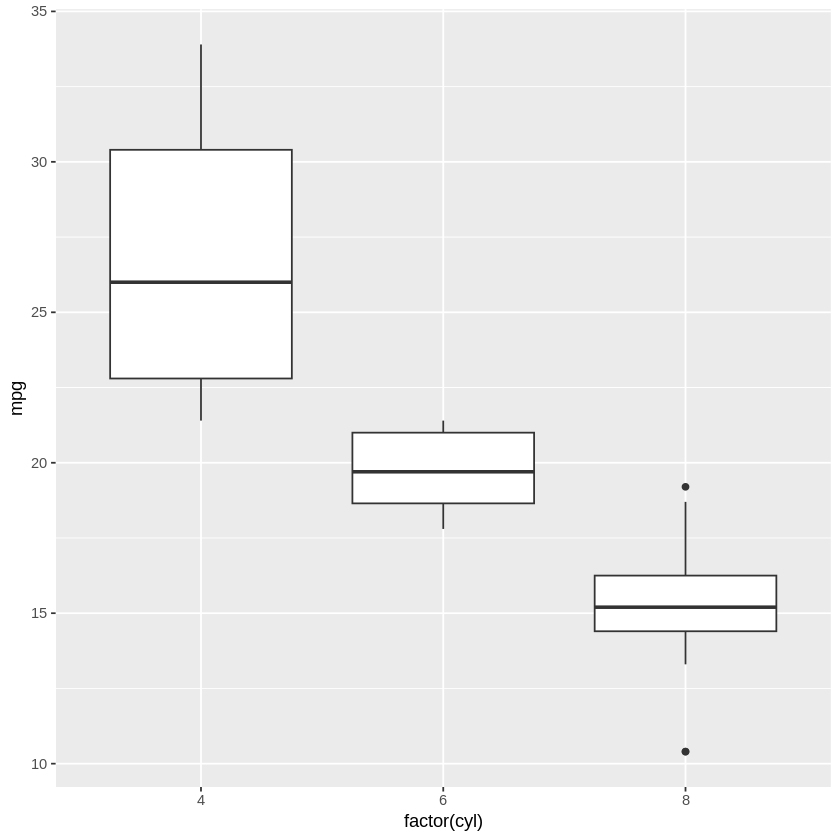

In [3]:
## Boxplot of 2 variables, uncolored
ggplot(data = mtcars, mapping = aes(y = mpg, x = factor(cyl))) +
  geom_boxplot()

## Multiple boxplots, options

We can do many fancy things, such as color the boxplots based on values of a variable (e.g., all cars with 4 cylinders are red) and add some simple themes, such as with the theme_bw() (i.e., black & white theme).

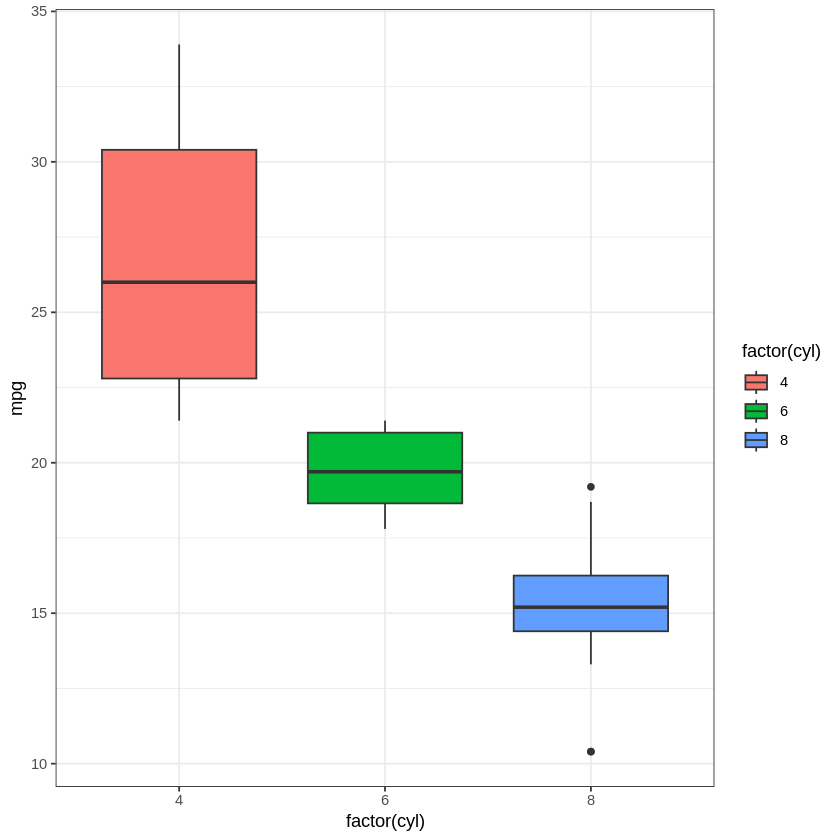

In [4]:
## Boxplot of 2 variables, colored, with black & white theme
ggplot(data = mtcars, mapping = aes(y = mpg, x = factor(cyl))) +
  geom_boxplot(aes(fill = factor(cyl))) +
  theme_bw()

# Geometric objects in ggplot

In ggplot jargon, the geometric object, or geom, is essentially the type of graph we wish to produce. Some of the common ones we have discussed are as follows:

- geom_bar(): A bar graphs

- geom_histogram(): A histogram

- geom_density(): A density plot

- geom_boxplot(): A boxplot

- geom_point(): A scatterplot

## Bar graphs

These are good visualizations to see the frequency (e.g., count) of observations within a specific category. Let's see how many of the included cars have 4, 6, or 8 cylinders.

There are more cars, in this dataset, with 8 cylinders, than any other. The category with the fewest observations here is cars with 6 cylinders.

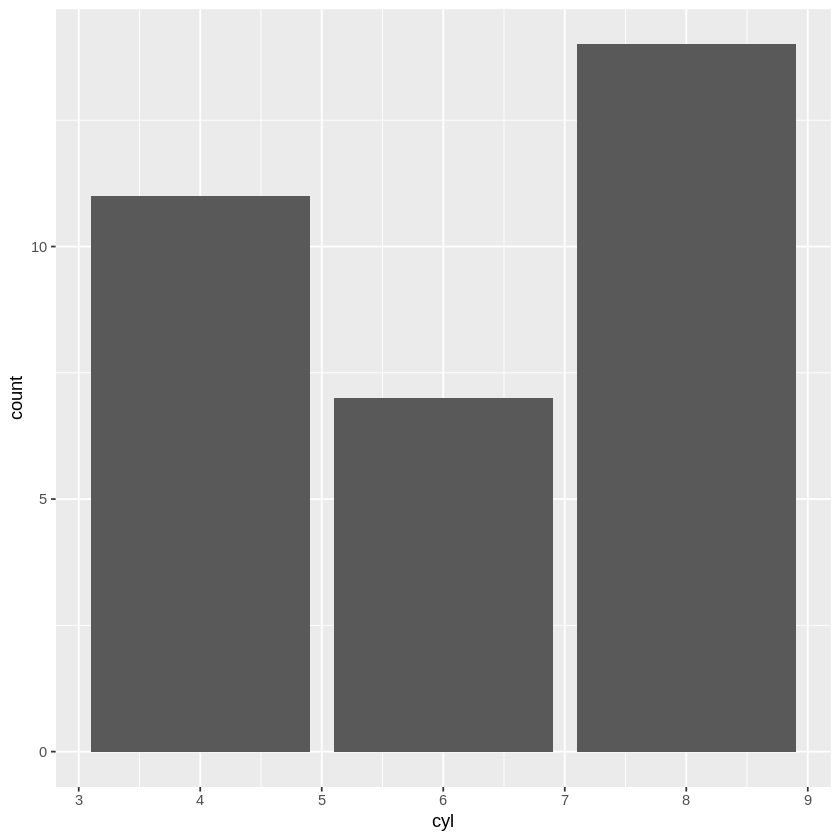

In [5]:
## Simple bar graph of car cylinders
ggplot(data = mtcars, mapping = aes(x = cyl)) +
  geom_bar()

### Bar graph options

If we want to get fancy, we can add colors and an outline.

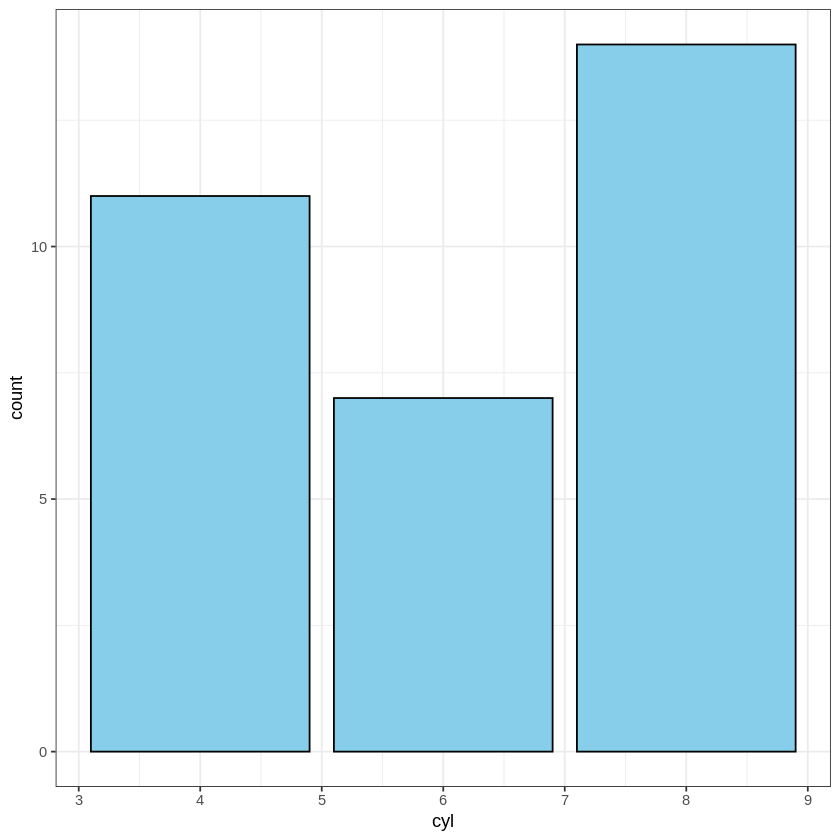

In [6]:
## Add a few elements to make it look nicer
ggplot(data = mtcars, mapping = aes(x = cyl)) +
  geom_bar(color = "black", fill = "skyblue") +
  theme_bw()

### Bar graphs: stacked vs grouped

Recall that we always prefer *grouped* bar graphs to *stacked* bar graphs.

Let's take a look at 2 variables at once: car cylinders and how many gears it has. Again, you can mostly ignore the factor() function, this just forces variables to be categorical.

The position = "dodge" part is what creates a grouped bar graph. If we remove that specific argument, it creates a stacked bar graph.

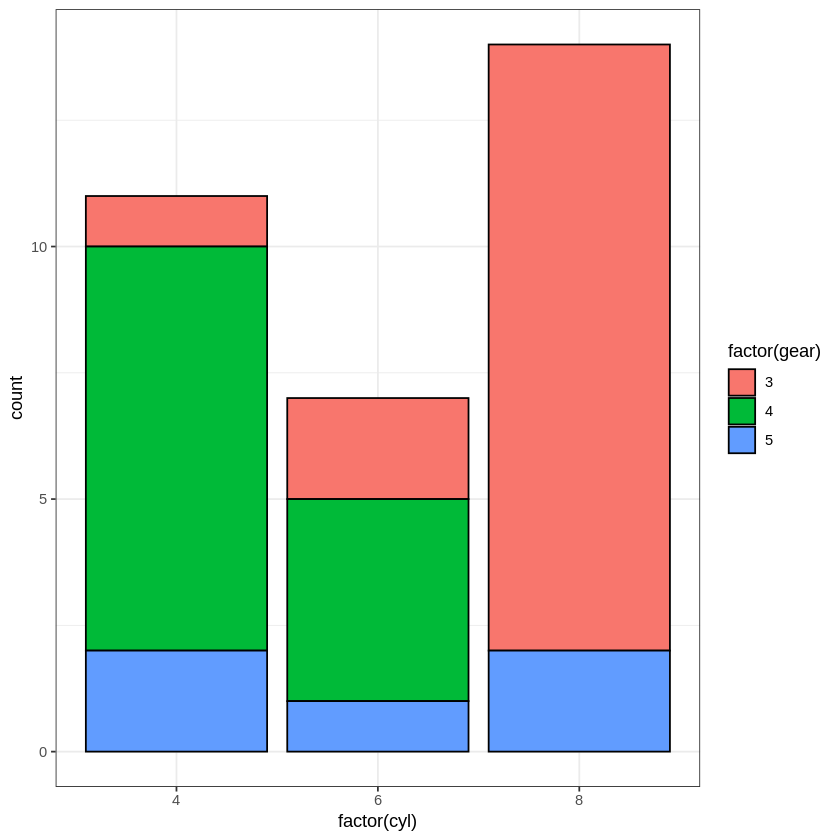

In [11]:
## Create STACKED bar graphs for car cylinders and number of gears
ggplot(data = mtcars, mapping = aes(x = factor(cyl), fill = factor(gear))) +
  geom_bar(position = "stack", color = "black") +
  theme_bw()

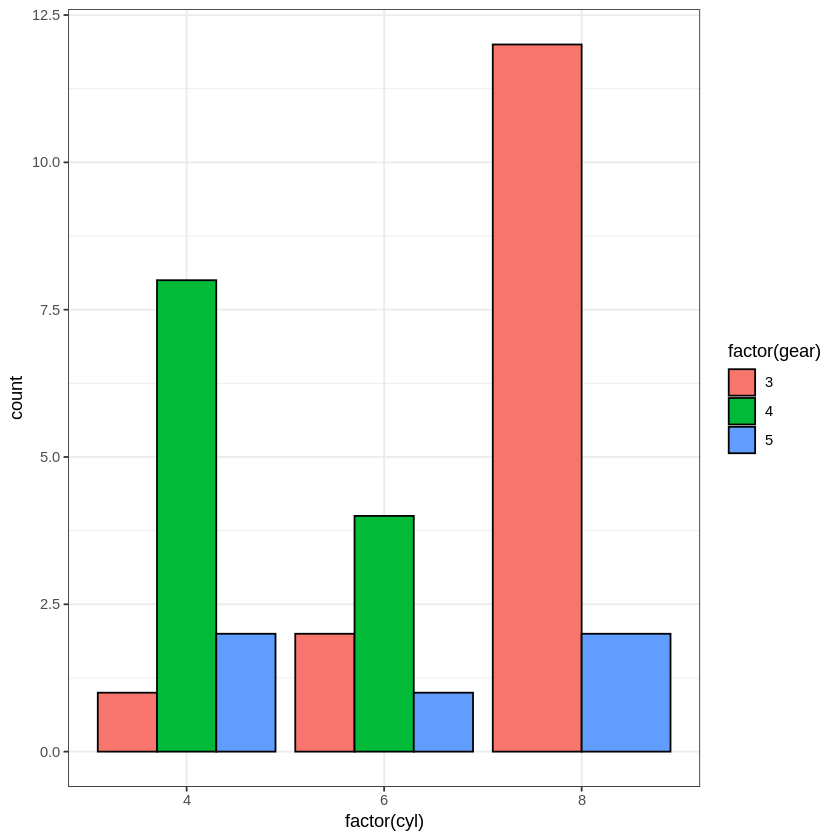

In [7]:
## Create GROUPED bar graphs for car cylinders and number of gears
ggplot(data = mtcars, mapping = aes(x = factor(cyl), fill = factor(gear))) +
  geom_bar(position = "dodge", color = "black") +
  theme_bw()

## Histograms

In ggplot2, histograms are created using the geom_histogram() function. This function is one approach to visualizing continuous data.

Importantly, the number of bins you choose *will* influence how useful the graph is. Too few bins and we cannot tell the distribution of the data and too many bins and the data will be too sparse. Play around with the bins argument.

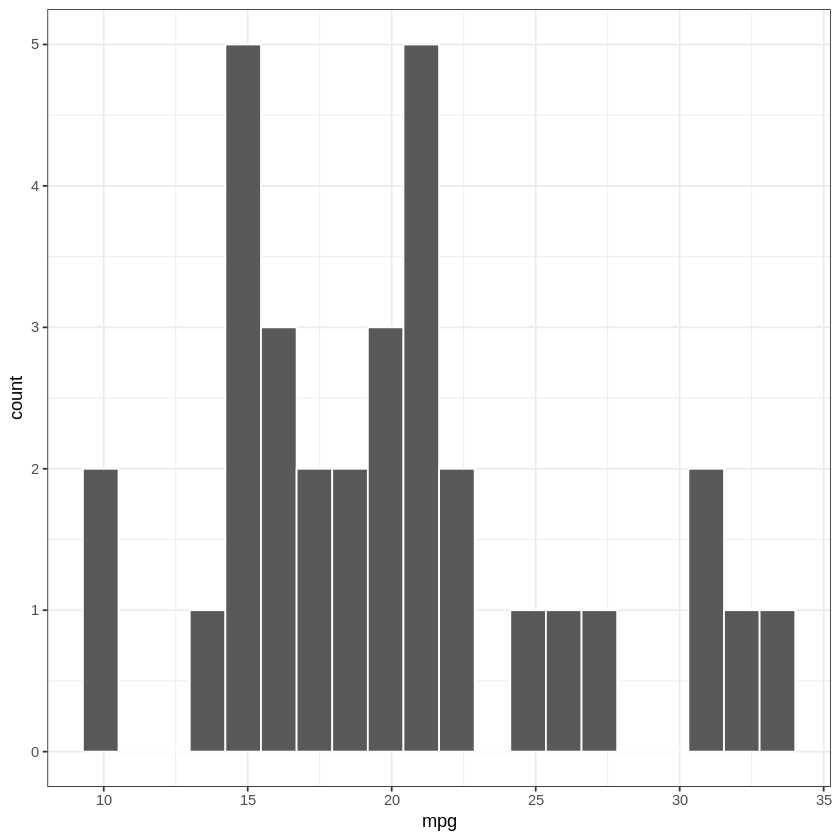

In [12]:
## A histogram with 20 bins
ggplot(data = mtcars, mapping = aes(x = mpg)) +
  geom_histogram(bins = 20, color = "white") +
  theme_bw()

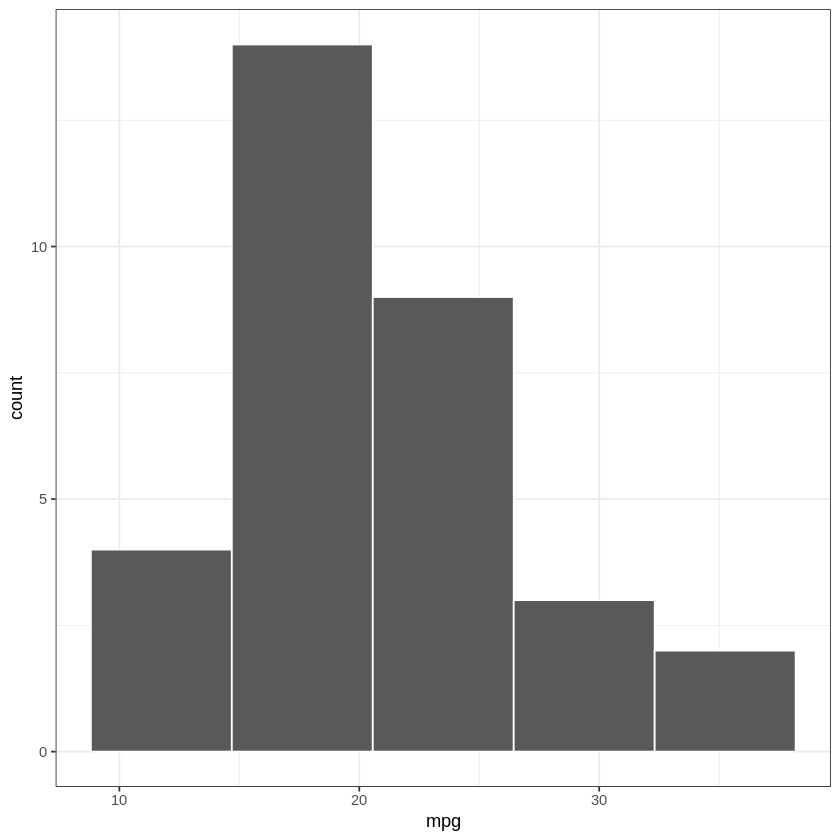

In [13]:
## A histogram with 5 bins
ggplot(data = mtcars, mapping = aes(x = mpg)) +
  geom_histogram(bins = 5, color = "white") +
  theme_bw()

## Density plots

Density plots are essentially a histogram without the need to set the bins. These use fancy algorithms to find a sort of 'rolling average' along each segment of the data continuum.

The mpg variable is continuous so we can also visualize it via a density plot.

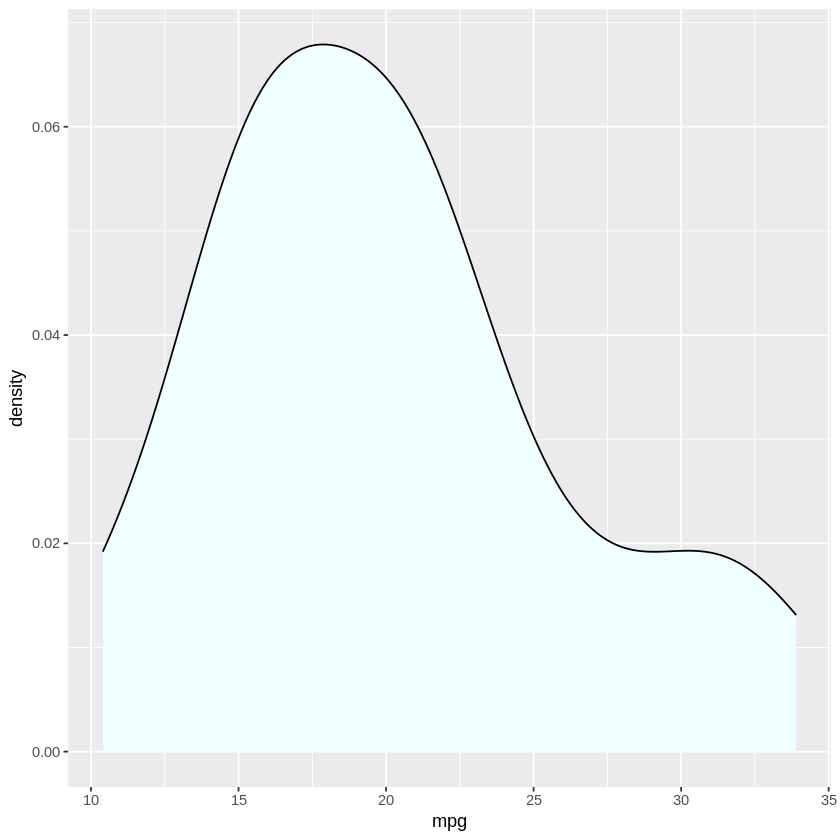

In [14]:
## Azure-colored density plot of car MPGs
ggplot(data = mtcars, mapping = aes(x = mpg)) +
  geom_density(fill = "azure")

## Scatterplots

To visualize two continuous variables, we will generally be using scatterplots. These are great tools to visualize correlations between any two variables.

Whereas the other plotting functions have intuitive names, scatterplots use the slightly different geom_point() function.

Let's visualize the relationship between the miles per gallon a car has and its overall horsepower. Clearly we can see that more horsepower is related to a worse fuel economy (i.e., lower mpg).

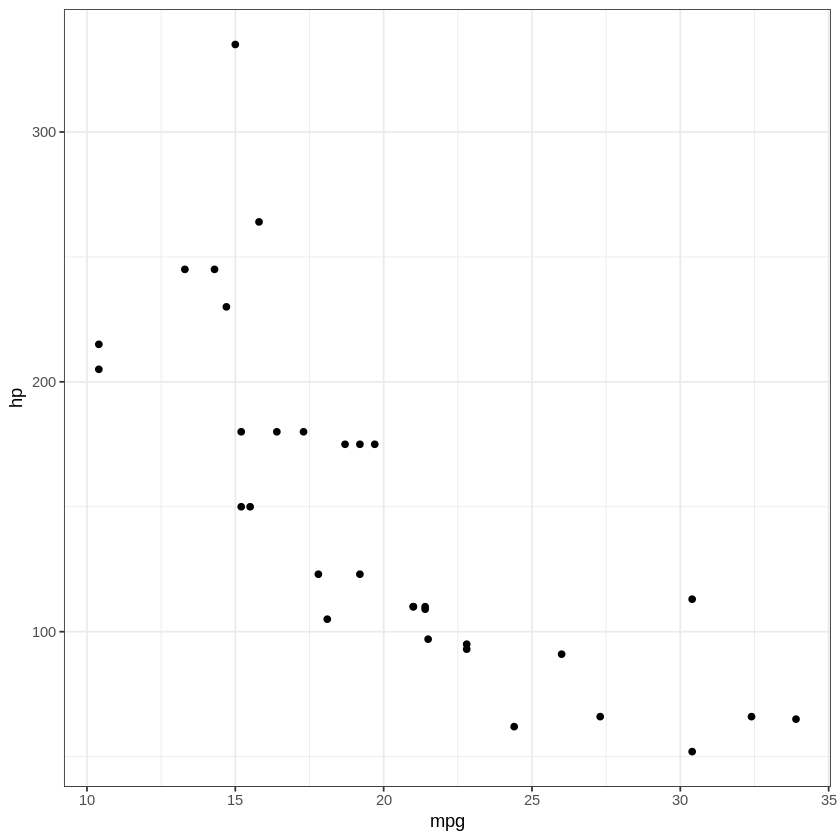

In [15]:
## Scatterplot of car MPG and horsepower with black & white theme
ggplot(data = mtcars, mapping = aes(x = mpg, y = hp)) +
  geom_point() +
  theme_bw()